`63070501061 S.RAKNA`

# Gradient Descent

#### 1. The following points $(x_i, y_i)$ are discrete samples from a function $f(x) = ax^3 + bx^2 + cx + d$.

> 5 points. 0.5 hrs

##### a. Show the update rule equation used to find the current $a, b, c,$ and $d$ after each iteration. 
- Make sure you show the mathematics on how this is derived.

<p style="color: red;">The answer is in an <code>update()</code> method </p>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


In [3]:
STEP_SIZE = 0.000005
ITERATE = 100000


class Polynomial:
    def __init__(self, coefficients, points):
        self.coefficients = coefficients
        self.points = points
        self.degree = len(coefficients) - 1

    def f(self, x, coefficients=None):
        """
        Evaluate the polynomial at x.
        f(x) = sum(coefficients[i] * x^(i - 1))
        """

        if coefficients is None:
            coefficients = self.coefficients

        return sum(
            coefficients[i] * x ** i
            for i in range(self.degree + 1)
        )

    def residual(self, point, coefficients=None):
        """
        Calculate the residual of the polynomial at the given point.
        residual = y - f(x)
        """
        if coefficients is None:
            coefficients = self.coefficients
        return point.y - self.f(point.x, coefficients=coefficients)

    def E(self, coefficients=None):
        """
        Calculate the error of the polynomial.
        E = sum((y - f(x))^2)
        """
        if coefficients is None:
            coefficients = self.coefficients

        return sum(
            self.residual(point, coefficients=coefficients) ** 2
            for point in self.points
        )

    def gradient(self):
        """
        Calculate the gradient of the polynomial.
        gradient = sum(-2 * (y - f(x)) * x^(i - 1))
        """
        return np.array([
            sum([
                -2 * self.residual(point) * point.x ** i
                for point in self.points
            ])
            for i in range(self.degree + 1)
        ])

    def update(self, step_size):
        """
        Update the coefficients of the polynomial with respect to the step_size.
        """
        gradient = self.gradient()
        self.coefficients = [
            self.coefficients[i] - step_size *
            gradient[i]  # update coefficient
            for i in range(self.degree + 1)
        ]

    def plot_fitted(self):
        """
        Plot the fitted polynomial.
        """
        # self.points x min to max
        plt.plot([point.x for point in self.points], [self.f(point.x)
                                                      for point in self.points], 'b--')
        plt.plot([point.x for point in self.points], [
                 point.y for point in self.points], 'ro')
        plt.show()

    def gradient_descent(self, step_size=STEP_SIZE, max_iterations=ITERATE):
        """
        Perform gradient descent on the polynomial.
        """
        E_list = np.array([self.E()])

        for i in range(max_iterations):
            self.update(step_size)
            if i % (max_iterations // 20) == 0:
                E = self.E()
                print(f"iteration: {i}, error: {E}")
                E_list = np.append(E_list, E)

        # Plot the error with dash
        plt.plot(E_list, 'r--')
        plt.show()

        print(f"Final error: {self.E()}")


> 15 points. 2 hrs

##### b. Write a program to find the best fit $a, b, c,$ and $d$ using gradient descent. 
- You must write the gradient descent loop yourself and not use any gradient descent libraries. Attach the source code as well. 

> Hint: You should get a, b, c, and d close to 0.5, 5.3, -2.7, and 3.5, respectively.

In [4]:
points = np.array([
    Point(-6, 103),
    Point(-5, 87),
    Point(-4, 67),
    Point(-3, 46),
    Point(-2, 26),
    Point(-1, 11),
    Point(0, 4),
    Point(1, 7),
    Point(2, 23),
    Point(3, 57),
    Point(4, 110),
    Point(5, 185),
    Point(6, 286)
])


iteration: 0, error: 45235016837.04277


/var/folders/dm/8jvmtg054t9fvkdq5lplxb200000gn/T/ipykernel_987/308979143.py:53: RuntimeWarning: overflow encountered in scalar add
  sum([
/var/folders/dm/8jvmtg054t9fvkdq5lplxb200000gn/T/ipykernel_987/308979143.py:54: RuntimeWarning: overflow encountered in scalar multiply
  -2 * self.residual(point) * point.x ** i
/var/folders/dm/8jvmtg054t9fvkdq5lplxb200000gn/T/ipykernel_987/308979143.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  coefficients[i] * x ** i
/var/folders/dm/8jvmtg054t9fvkdq5lplxb200000gn/T/ipykernel_987/308979143.py:20: RuntimeWarning: invalid value encountered in scalar add
  return sum(


iteration: 5000, error: nan
iteration: 10000, error: nan
iteration: 15000, error: nan
iteration: 20000, error: nan
iteration: 25000, error: nan
iteration: 30000, error: nan
iteration: 35000, error: nan
iteration: 40000, error: nan
iteration: 45000, error: nan
iteration: 50000, error: nan
iteration: 55000, error: nan
iteration: 60000, error: nan
iteration: 65000, error: nan
iteration: 70000, error: nan
iteration: 75000, error: nan
iteration: 80000, error: nan
iteration: 85000, error: nan
iteration: 90000, error: nan
iteration: 95000, error: nan


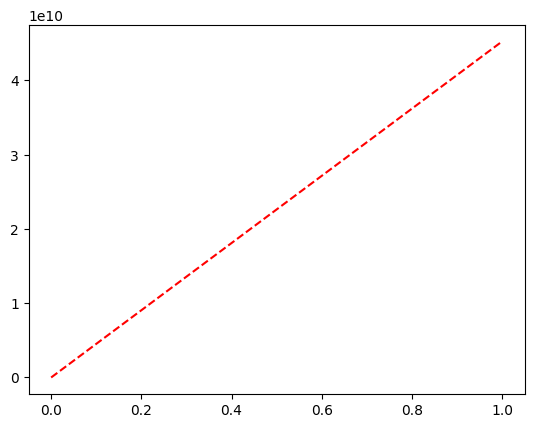

Final error: nan


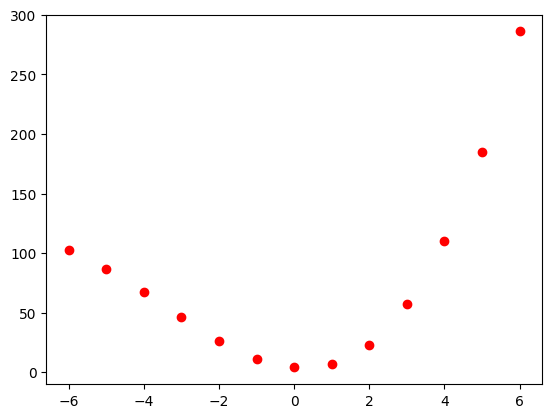

coefficients: [nan, nan, nan, nan, nan, nan]


In [5]:
coefficients = np.array([0, 0, 0, 0, 0, 0])
polynomial = Polynomial(coefficients, points)
polynomial.gradient_descent()

# Plot the points and the polynomial, points in red
polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {polynomial.coefficients}")

> 10 points. 1 hr.
#### 2. Redo Problem *1b*, but use the **numerical method** to calculate all your partial derivatives, where $h$ is a very small number.
#### $\frac{\partial}{{\partial}{x_i}}f(x_1,\dots\,,x_i,\,\dots,\,x_n)=\frac{f(x_1,\dots\,,x_i+h,\,\dots,\,x_n)-f(x_1,\dots\,,x_i-h,\,\dots,\,x_n)}{2h}$

In [6]:
class NumericalPolynomial(Polynomial):
    def __init__(self, coefficients, points):
        super().__init__(coefficients, points)

    # Override the gradient function
    def gradient(self):
        """
        This time we will use numerical differentiation to calculate the gradient of E()
        """

        h = 1e-12
        new = np.array([])

        for i in range(self.degree + 1):
            c_plus = self.coefficients.copy()
            c_plus[i] += h
            c_minus = self.coefficients.copy()
            c_minus[i] -= h
            new = np.append(new, (self.E(c_plus) - self.E(c_minus)) / (2 * h))

        return new


iteration: 0, error: 157544.0
iteration: 5000, error: 9.172220898194013e+16
iteration: 10000, error: 9.172220898194013e+16
iteration: 15000, error: 9.172220898194013e+16
iteration: 20000, error: 9.172220898194013e+16
iteration: 25000, error: 9.172220898194013e+16
iteration: 30000, error: 9.172220898194013e+16
iteration: 35000, error: 9.172220898194013e+16
iteration: 40000, error: 9.172220898194013e+16
iteration: 45000, error: 9.172220898194013e+16
iteration: 50000, error: 9.172220898194013e+16
iteration: 55000, error: 9.172220898194013e+16
iteration: 60000, error: 9.172220898194013e+16
iteration: 65000, error: 9.172220898194013e+16
iteration: 70000, error: 9.172220898194013e+16
iteration: 75000, error: 9.172220898194013e+16
iteration: 80000, error: 9.172220898194013e+16
iteration: 85000, error: 9.172220898194013e+16
iteration: 90000, error: 9.172220898194013e+16
iteration: 95000, error: 9.172220898194013e+16


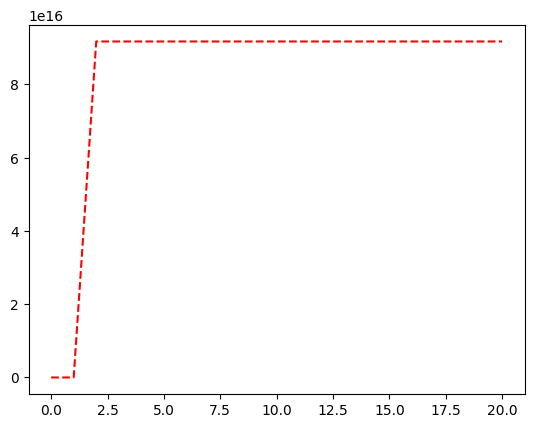

Final error: 9.172220898194013e+16


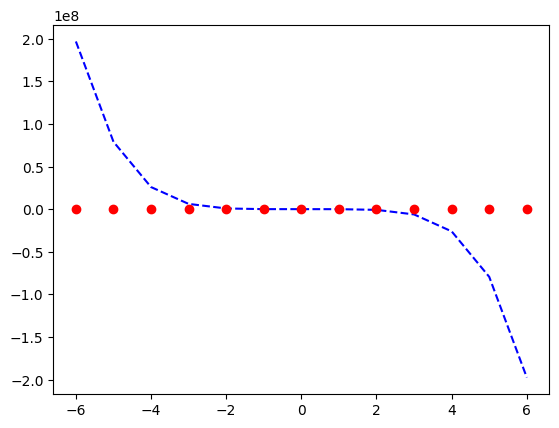

coefficients: [0.010186340659856796, -19.05558747239411, 19.321159925311804, -781.4649143256248, -297.8899283334613, -25330.904609290887]


In [7]:
# This section is step of gradient descent algorithm
# Initialize the coefficients of the polynomial
numerical_polynomial = NumericalPolynomial(coefficients, points)
numerical_polynomial.gradient_descent()

# Plot the points and the polynomial, points in red
numerical_polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {numerical_polynomial.coefficients}")


> 10 points. 1 hr.
#### 3. Solve Problem *1b* using **Pseudo-Inverse Linear Regression** to find $(a, b, c, d)$ 
- You can use numpy or other tools to invert matrices.

In [8]:
class PseudoInversePolynomial(Polynomial):
    def __init__(self, coefficients, points):
        super().__init__(coefficients, points)

    def pseudo_inverse(self):
        """
        Calculate the pseudo inverse of the matrix A.
        """
        A = np.array([
            [point.x ** i for i in range(self.degree + 1)]
            for point in self.points
        ])
        print(f"A =\n{A}\n")
        X = np.linalg.inv(A.T @ A) @ A.T
        print(f"X =\n{X}")
        # return np.linalg.pinv(A) can also be used
        return X


A =
[[    1    -6    36  -216  1296 -7776]
 [    1    -5    25  -125   625 -3125]
 [    1    -4    16   -64   256 -1024]
 [    1    -3     9   -27    81  -243]
 [    1    -2     4    -8    16   -32]
 [    1    -1     1    -1     1    -1]
 [    1     0     0     0     0     0]
 [    1     1     1     1     1     1]
 [    1     2     4     8    16    32]
 [    1     3     9    27    81   243]
 [    1     4    16    64   256  1024]
 [    1     5    25   125   625  3125]
 [    1     6    36   216  1296  7776]]

X =
[[ 4.52488688e-02 -8.14479638e-02 -5.55327026e-02  4.52488688e-02
   1.60427807e-01  2.46812012e-01  2.78486220e-01  2.46812012e-01
   1.60427807e-01  4.52488688e-02 -5.55327026e-02 -8.14479638e-02
   4.52488688e-02]
 [-3.30693816e-02  9.28733032e-02 -4.11353353e-05 -1.14873852e-01
  -1.56797614e-01 -1.07568902e-01  0.00000000e+00  1.07568902e-01
   1.56797614e-01  1.14873852e-01  4.11353353e-05 -9.28733032e-02
   3.30693816e-02]
 [-1.89479638e-02  2.54524887e-02  3.00287947e-02

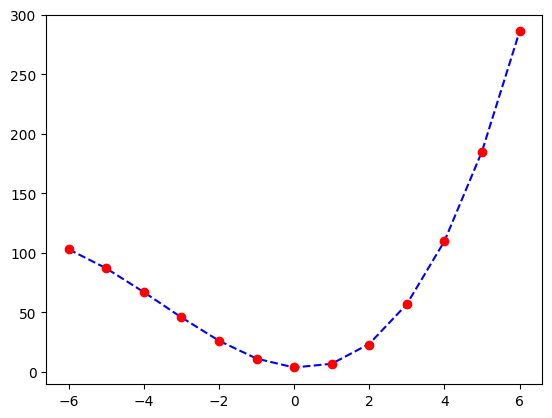

coefficients: [ 3.69683258e+00 -2.68517414e+00  5.28952420e+00  5.04563451e-01
  2.74235568e-04 -1.79110106e-04]
error: 0.6239201974496076


In [9]:
pseudo_inverse_polynomial = PseudoInversePolynomial(coefficients, points)

pseudo_inverse = pseudo_inverse_polynomial.pseudo_inverse()

pseudo_inverse_polynomial.coefficients = np.dot(
    pseudo_inverse, [point.y for point in points])

# Plot the points and the polynomial, points in red
pseudo_inverse_polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {pseudo_inverse_polynomial.coefficients}")
print(f"error: {pseudo_inverse_polynomial.E()}")


> 10 points. 1 hr.
#### 3. Solve Problem *1b* using the **Gauss-Newton method** to find $(a, b, c, d)$
- You can use numpy or other tools to invert matrices in each iteration

#### $X^{t+1}=X^t-{\alpha}J^{\#1}r(X^t)=X^t-{\alpha}(J^TJ)^{-1}J^Tr(X^t);{\alpha}=1 \text{works for linear case}$

In [10]:
class GaussNewtonPolynomial(Polynomial):
    def __init__(self, coefficients, points):
        super().__init__(coefficients, points)
        self.J = self.jacobian()

        print(f"Jacobian matrix:\n{self.J}")

    def jacobian(self):
        """
        Calculate the jacobian matrix.
        """
        return np.array([
            [point.x ** i for i in range(self.degree + 1)]
            for point in self.points
        ])

    def update(self, step_size):
        """
        Update the coefficients of the polynomial with respect to the step_size 
        using Gauss-Newton algorithm with Jacobian matrix.
        """

        r = np.array([self.residual(point) for point in self.points])
        
        delta = np.linalg.inv(self.J.T @ self.J) @ self.J.T @ r

        self.coefficients = [
            self.coefficients[i] + step_size * delta[i] # update coefficient
            for i in range(self.degree + 1)
        ]

Jacobian matrix:
[[    1    -6    36  -216  1296 -7776]
 [    1    -5    25  -125   625 -3125]
 [    1    -4    16   -64   256 -1024]
 [    1    -3     9   -27    81  -243]
 [    1    -2     4    -8    16   -32]
 [    1    -1     1    -1     1    -1]
 [    1     0     0     0     0     0]
 [    1     1     1     1     1     1]
 [    1     2     4     8    16    32]
 [    1     3     9    27    81   243]
 [    1     4    16    64   256  1024]
 [    1     5    25   125   625  3125]
 [    1     6    36   216  1296  7776]]
iteration: 0, error: 157512.49290021783
iteration: 5000, error: 57943.1048687944
iteration: 10000, error: 21315.405594868527
iteration: 15000, error: 7841.5018115314015
iteration: 20000, error: 2884.977466256502
iteration: 25000, error: 1061.6652339332254
iteration: 30000, error: 390.93968817681923
iteration: 35000, error: 144.20588704560257
iteration: 40000, error: 53.44213277108818
iteration: 45000, error: 20.053683145509627
iteration: 50000, error: 7.771373127463918
i

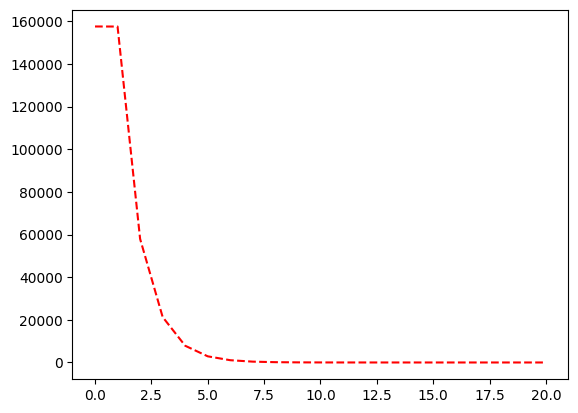

Final error: 0.62424459396944


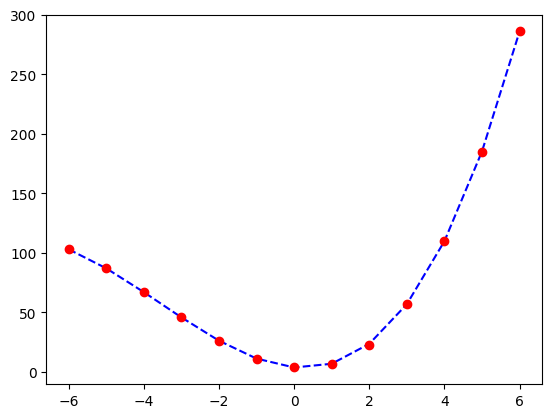

coefficients: [3.6966648271486595, -2.6850522938107346, 5.289284177311711, 0.5045405555608529, 0.00027422312430166947, -0.0001791019780595288]


In [11]:
# This section is step of gradient descent algorithm
# Initialize the coefficients of the polynomial
gauss_newton_polynomial = GaussNewtonPolynomial(coefficients, points)
gauss_newton_polynomial.gradient_descent(step_size=0.0001)

# Plot the points and the polynomial, points in red
gauss_newton_polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {gauss_newton_polynomial.coefficients}")